In [1]:
import pyroomacoustics as pra
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_rate = 16000

side_length = 10
room_2d = pra.ShoeBox(np.array([side_length, side_length]), fs=sample_rate, max_order=17, absorption=0.35)
room_3d = pra.ShoeBox(np.array([side_length, side_length, side_length]), fs=sample_rate, max_order=17, absorption=0.35)

In [3]:
mic_positions_2d = pra.circular_2D_array(center=(side_length / 2, side_length / 2), M=8, phi0=0, radius=0.5)

new_axis = np.array([side_length / 2] * mic_positions_2d.shape[1])
mic_positions_3d = np.concatenate((mic_positions_2d[0], new_axis, mic_positions_2d[1])).reshape(-1, mic_positions_2d.shape[1])

In [4]:
room_2d.add_microphone_array(pra.MicrophoneArray(mic_positions_2d, room_2d.fs))
room_3d.add_microphone_array(pra.MicrophoneArray(mic_positions_3d, room_3d.fs))

In [5]:
signal = np.random.randn(sample_rate * 1)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

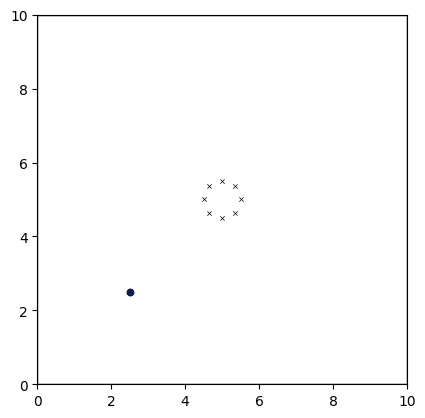

In [6]:
room_2d.add_source([side_length / 4, side_length / 4], signal=signal)
room_2d.plot()

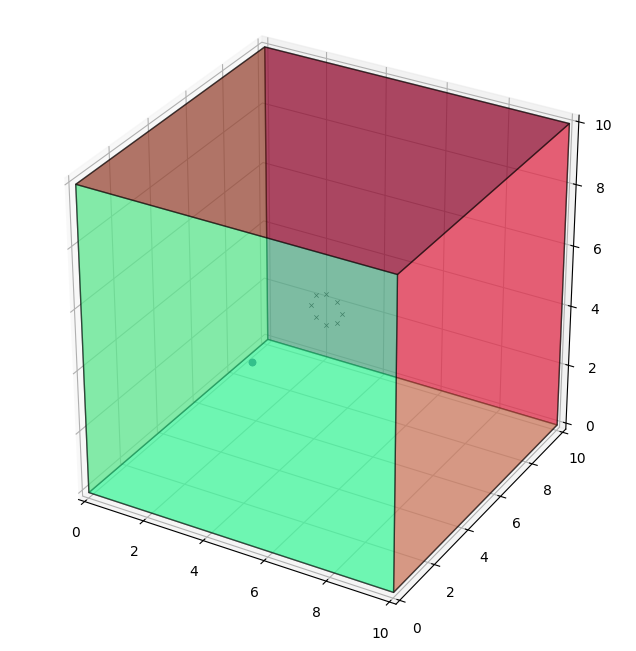

In [7]:
room_3d.add_source([side_length / 4, side_length / 2, side_length / 4], signal=signal)

def plot_room(room: pra.ShoeBox) -> None:
    room_dim = room.get_bbox()[:, 1]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    room.plot(ax=ax)

    # プロット範囲を部屋の大きさに合わせる
    ax.set_xlim([0, room_dim[0]])
    ax.set_ylim([0, room_dim[1]])
    ax.set_zlim([0, room_dim[2]])
    ax.set_box_aspect(room_dim)
    plt.show()

plot_room(room_3d)

In [8]:
room_2d.compute_rir()
room_3d.compute_rir()

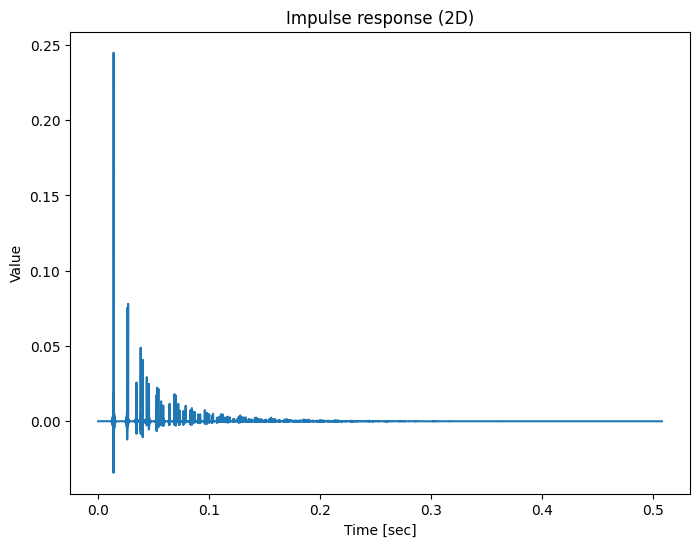

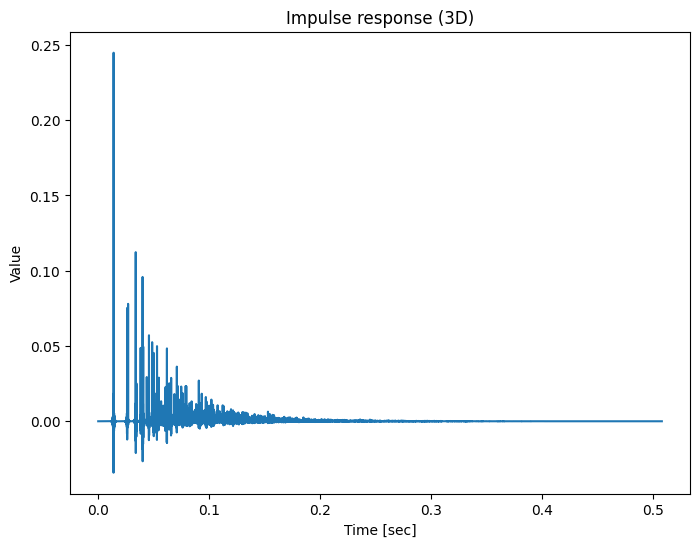

In [10]:
for name, room in zip(["2D", "3D"], [room_2d, room_3d]):
    impulse_responses = room.rir
    impulse_length = impulse_responses[0][0].shape[0]

    # plot impulse response
    x = np.array(range(impulse_length)) / sample_rate
    plt.figure(figsize=(8, 6))
    plt.xlabel("Time [sec]")
    plt.ylabel("Value")
    plt.title(f"Impulse response ({name})")
    plt.plot(x, impulse_responses[0][0])
    plt.show()